In [32]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# imports
import tensorflow as tf
import keras.layers as layers
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
import string
import numpy as np
import pandas as pd

In [35]:
# experiment name
name = 'base'

# Dataset

In [36]:
df = pd.read_csv("data/dataset_base.csv")
print(df.shape)
df.sample(10)

(20000, 2)


,Name,class
19987,لذة شجون هااشم,0.0
7018,عقاب مدرك منتصر,1.0
14175,المعارضة صبرا المبني,0.0
3137,براء سيار عبداللطيف,1.0
16380,دمومح عيدب وتسلسل,0.0
7520,ناهل وارف حارث,1.0
12302,سسححرر ميسساء صفوانن,0.0
6596,شفيق شاهر أشيم,1.0
2868,عائذ ساجع معروف,1.0
13210,أأييسر طيف لججينةة,0.0


In [40]:
# max number of words per name
df['Name'].str.split().str.len().max()

5

In [41]:
df.head(5)

,Name,class
0,أمين عنتر قتادة,1.0
1,بتول مجير شيبان,1.0
2,مشعل أبان سيد,1.0
3,سعاد نصرت عجاج,1.0
4,حارب أهيم إيهاب,1.0


In [42]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Name,class
0,أأممينن عبدالمججيد ناييفف,0.0
1,تمانني عماد الادمان,0.0
2,ينال يستحقها يحدثنا,0.0
3,ملحم صلاح الدين معمر,1.0
4,الفاشلة يستجيب الروائى,0.0


## Document Preprocessing

In [43]:
# adding start and end tokens
names = ['<SOS> ' + x + ' <EOS>' for x in df['Name'].tolist()]
corpus = " ".join(names)
labels = df['class'].tolist()
corpus[:1000]

'<SOS> أأممينن عبدالمججيد ناييفف <EOS> <SOS> تمانني عماد الادمان <EOS> <SOS> ينال يستحقها يحدثنا <EOS> <SOS> ملحم صلاح الدين معمر <EOS> <SOS> الفاشلة يستجيب الروائى <EOS> <SOS> عبدالغفور منان سليم <EOS> <SOS> اندء صارم حسنن <EOS> <SOS> الأشجار المصالح الأربعون <EOS> <SOS> ريتاج غانم سفيان <EOS> <SOS> تولليب ررشا سعاد <EOS> <SOS> املك كنعان أويس <EOS> <SOS> والجميل المسابح خشية <EOS> <SOS> منعم مثاب كعب <EOS> <SOS> وناس خلينا متاحة <EOS> <SOS> ثويبة هيثم أدعج <EOS> <SOS> ميثاءء سبييعة رريمم <EOS> <SOS> رببى مننان ششرييح <EOS> <SOS> جدو جوى حسر <EOS> <SOS> دنبر حتفو الكم <EOS> <SOS> بموضوع أزهار باسط <EOS> <SOS> نادية فخر نضير <EOS> <SOS> يرسام نءساح رعاف <EOS> <SOS> ذاكر ةمهفر ابراهيم <EOS> <SOS> ظبية عمر مهيوب <EOS> <SOS> سعدون حكيم أزهر <EOS> <SOS> رنا لإالج ذنرمة <EOS> <SOS> أصيل بلليغة ثراء <EOS> <SOS> عبدالمجيد مرحب راجي <EOS> <SOS> ماهر رابح كلاب <EOS> <SOS> منعم محيا أكمل <EOS> <SOS> البندري عيد عارف <EOS> <SOS> نجلاء شجاع أخزم <EOS> <SOS> باتل صقر أيهم <EOS> <SOS> نوفل أدهم شاهر

## Tokenization 

In [45]:
tokenize = tf.keras.preprocessing.text.Tokenizer(oov_token="<UNK>", filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n', lower=False)
tokenize.fit_on_texts(names)
x = tokenize.texts_to_sequences(names)
max_len = 6
x = tf.keras.utils.pad_sequences(x, maxlen=max_len, padding='post')
total_words = len(tokenize.word_index)+1
print(f"Total Words: {total_words}")
print("Example of a Sequence")
print(x[:3])
print("Some Tokens")
print(list(tokenize.word_index)[:10])

Total Words: 5086
Example of a Sequence
[[   2 3103 2028 2531    3    0]
 [   2 1282  708 4220    3    0]
 [   2 3104 2029 1679    3    0]]
Some Tokens
['<UNK>', '<SOS>', '<EOS>', 'الدين', 'بكر', 'ناصر', 'علاء', 'نجم', 'صلاح', 'معين']


## Splitting data and making dataset 

In [46]:
x_train, x_valid, y_train, y_valid = train_test_split(x, df['class'].values, test_size=.2, random_state=23)
print("Train and Validation sizes")
len(x_train), len(x_valid), len(y_train), len(y_valid)

Train and Validation sizes


(16000, 4000, 16000, 4000)

In [47]:
y_train.sum(), y_valid.sum()

(7936.0, 2064.0)

In [48]:
ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(128)
ds_valid = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(128)

In [49]:
for x,y in ds_train.take(1):
    print(x[:2], y[:2])

tf.Tensor(
[[   2 2930 2483 2760    3    0]
 [   2 2360 2326 3509    3    0]], shape=(2, 6), dtype=int32) tf.Tensor([0. 0.], shape=(2,), dtype=float64)


# Build and Train a Model: 

In [50]:
vocab_size = total_words
embedding_dim = 128
sequence_length = max_len
rnn_units = 512

In [56]:
model = tf.keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)],
  )

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         651008    
                                                                 
 dropout_4 (Dropout)         (None, None, 128)         0         
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 651,137
Trainable params: 651,137
Non-trainable params: 0
________________________________________________

In [57]:
model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy())

In [58]:
epochs = 10
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=epochs)

Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 0.6416 - binary_accuracy: 0.5064 - val_loss: 0.5489 - val_binary_accuracy: 0.5213
Epoch 2/10
125/125 [==============================] - 0s 4ms/step - loss: 0.4117 - binary_accuracy: 0.8456 - val_loss: 0.3062 - val_binary_accuracy: 0.9628
Epoch 3/10
125/125 [==============================] - 0s 4ms/step - loss: 0.2212 - binary_accuracy: 0.9783 - val_loss: 0.1904 - val_binary_accuracy: 0.9707
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1419 - binary_accuracy: 0.9830 - val_loss: 0.1441 - val_binary_accuracy: 0.9722
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1059 - binary_accuracy: 0.9861 - val_loss: 0.1215 - val_binary_accuracy: 0.9737
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0849 - binary_accuracy: 0.9887 - val_loss: 0.1087 - val_binary_accuracy: 0.9747
Epoch 7/10
125/125 [==============================] - 0s 3ms/ste

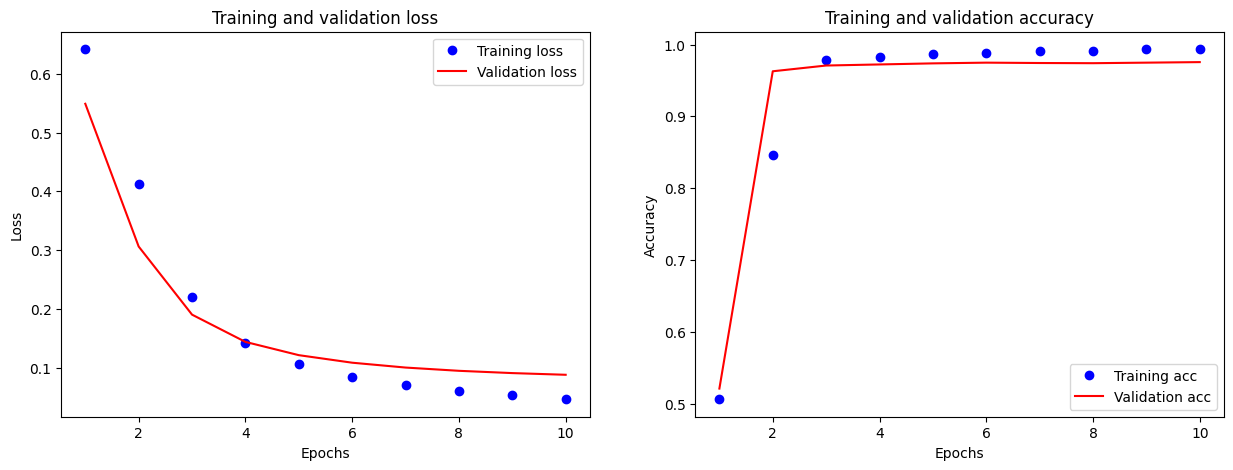

In [59]:
from utils import plot_history
plot_history(history.history)

### Test Examples 

In [60]:
#new
example = '<sos> ' + "معاذ طه عوض" + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 72ms/step


array([[0.999292]], dtype=float32)

In [61]:
#new
example = "باسم وحيد السيد"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 33ms/step


array([[0.9911911]], dtype=float32)

In [62]:
#new
example = "شسي شسي شسي"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 34ms/step


array([[0.49556518]], dtype=float32)

In [63]:
#new
example = "باسمم وحةد السد"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 28ms/step


array([[0.49556518]], dtype=float32)

In [64]:
#new
example = "مريم محمد محمد"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 32ms/step


array([[0.99652344]], dtype=float32)

In [65]:
#new
example = "محمد مريم محمد"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 36ms/step


array([[0.99652344]], dtype=float32)

In [66]:
#new
example = "مريم محمد الرمال"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 38ms/step


array([[0.702877]], dtype=float32)

In [67]:
#new
example = "محمد طه عوض"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 50ms/step


array([[0.99844605]], dtype=float32)

In [68]:
#new
example = "زيادد عبدالرحمنت على"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 36ms/step


array([[0.49556518]], dtype=float32)

In [84]:
#new
example = "دزيادد عبت محمد"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 44ms/step


array([[0.95524055]], dtype=float32)

In [69]:
#new
example = "محمد طه عوض لاشين"
example = '<sos> ' + example + ' <eos>'
example_vect = tokenize.texts_to_sequences([example])
tf.nn.sigmoid(model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 50ms/step


array([[0.9954353]], dtype=float32)

# Saving and loading the trained model 

In [71]:
model.save(f'models/{name}_model', )

INFO:tensorflow:Assets written to: models/base_model/assets


In [72]:
new_model = tf.keras.models.load_model(f'models/{name}_model')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         651008    
                                                                 
 dropout_4 (Dropout)         (None, None, 128)         0         
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 651,137
Trainable params: 651,137
Non-trainable params: 0
________________________________________________

## Saving and loading the tokenizer

In [73]:
import pickle

# saving
with open(f'models/{name}tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenize, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open(f'models/{name}tokenizer.pickle', 'rb') as handle:
    new_tokenizer = pickle.load(handle)

In [74]:
#new
example = "محمد طه عوض لاشين"
example = '<sos> ' + example + ' <eos>'
example_vect = new_tokenizer.texts_to_sequences([example])
tf.nn.sigmoid(new_model.predict(example_vect)).numpy()

1/1 [==============================] - 0s 91ms/step


array([[0.9954353]], dtype=float32)